Dear Participant,

Please find below the Project 1 for Unsupervised Learning course. This is an individual assignment. Kindly submit it before it's deadline.

The dataset was used in the 1983 American Statistical Association Exposition. The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 2 multivalued discrete and 4 continuous variables. 

Dataset: cars-dataset.csvView in a new window

Attribute Information:

Car Name – Name of the car

Cyl – No of cylinders in the car – Multivalued discrete

Disp – Displacement – continuous

Hp – Horsepower – continuous

Wt – Weight – continuous

Acc – Accleration – continuous

Yr – Model of the car – Multivalued discrete

**Steps to follow:**

- EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points
- Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points
- Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)
- Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
Missing_Values = ["inf","missing","?"]
df_cars = pd.read_csv("cars-dataset.csv",low_memory=False,keep_default_na = True, na_values = Missing_Values)

In [3]:
df_cars.sample(5)

,car name,cyl,disp,hp,wt,acc,yr,mpg
338,plymouth reliant,4,135.0,84.0,2490,15.7,81,27.2
66,amc ambassador sst,8,304.0,150.0,3672,11.5,72,17.0
267,toyota corona,4,134.0,95.0,2560,14.2,78,27.5
245,ford fiesta,4,98.0,66.0,1800,14.4,78,36.1
225,chevrolet concours,6,250.0,110.0,3520,16.4,77,17.5


In [4]:
df_cars2 = df_cars.copy()

In [5]:
df_cars2[~df_cars2.applymap(np.isreal).all(1)]

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130.0,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165.0,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150.0,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150.0,3433,12.0,70,16.0
4,ford torino,8,302.0,140.0,3449,10.5,70,17.0
5,ford galaxie 500,8,429.0,198.0,4341,10.0,70,15.0
6,chevrolet impala,8,454.0,220.0,4354,9.0,70,14.0
7,plymouth fury iii,8,440.0,215.0,4312,8.5,70,14.0
8,pontiac catalina,8,455.0,225.0,4425,10.0,70,14.0
9,amc ambassador dpl,8,390.0,190.0,3850,8.5,70,15.0


In [6]:
df_cars2.dtypes

car name     object
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [7]:
# finding missing values 

missing_values=df_cars2.columns[df_cars2.isnull().any()]
df_cars2[missing_values].isnull().sum()

hp    6
dtype: int64

In [8]:
#6 missing values found, deleteing these 6 records as the count of missing records is insignificant to the total. 
df_cars2[df_cars2["hp"].isnull()][missing_values]

,hp
32,NaN
126,NaN
330,NaN
336,NaN
354,NaN
374,NaN


In [9]:
df_cars2.dropna(subset= ['hp'], inplace = True)
df_cars2 = df_cars2.reset_index()

In [10]:
# Verifying no missing values are present
missing_values=df_cars2.columns[df_cars2.isnull().any()]
df_cars2[missing_values].isnull().sum()

Series([], dtype: float64)

In [11]:
# dropping insignificant features
df_cars3 = df_cars2.drop(["index","car name","mpg"],axis=1)

In [12]:
df_cars3.head(3)

,cyl,disp,hp,wt,acc,yr
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70


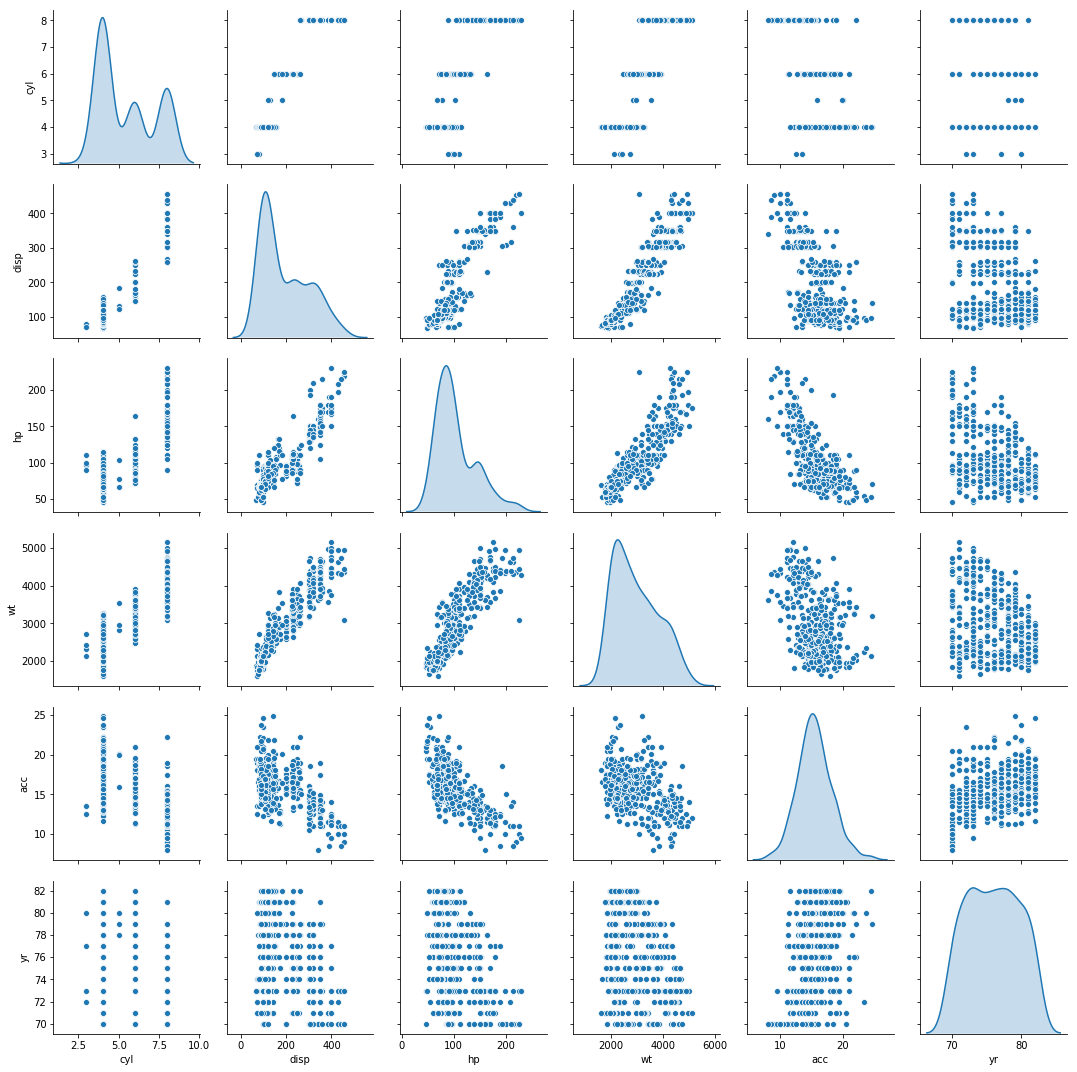

In [13]:
sns.pairplot(df_cars3,diag_kind='kde')

**Observation**
- The Gaussian curves in the plot diagonal indicate visual identification of 3 different clusters

In [14]:
# Determining optimil K value using euclidean dist equations
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_cars3)
    kmeanModel.fit(df_cars3)
    distortions.append(
        sum(np.min(cdist(df_cars3, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_cars3.shape[0])

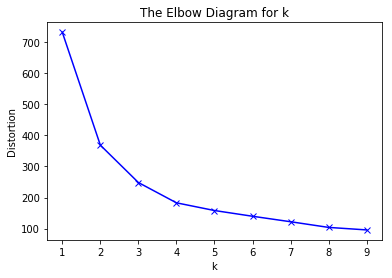

In [15]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Diagram for k')
plt.show()

**Observation**
- 3 seems optimal k value , from 4 the ROc is dimnishing

In [16]:
kmeans = KMeans(n_clusters=3)

In [17]:
kmeans.fit(df_cars3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
clusters = kmeans.labels_

In [19]:
clusters

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 2, 2, 2, 2, 0, 1, 0, 0, 2, 2,

In [20]:
df_cars2 = df_cars2.drop(['index'], axis=1)
df_cars2.head(10)

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130.0,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165.0,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150.0,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150.0,3433,12.0,70,16.0
4,ford torino,8,302.0,140.0,3449,10.5,70,17.0
5,ford galaxie 500,8,429.0,198.0,4341,10.0,70,15.0
6,chevrolet impala,8,454.0,220.0,4354,9.0,70,14.0
7,plymouth fury iii,8,440.0,215.0,4312,8.5,70,14.0
8,pontiac catalina,8,455.0,225.0,4425,10.0,70,14.0
9,amc ambassador dpl,8,390.0,190.0,3850,8.5,70,15.0


In [21]:
car_clusters = {'xcluster':clusters}
car_clusters_df = pd.DataFrame(car_clusters)

In [22]:
car_clusters_df.count()

xcluster    392
dtype: int64

In [23]:
df_cars2.count()

car name    392
cyl         392
disp        392
hp          392
wt          392
acc         392
yr          392
mpg         392
dtype: int64

In [24]:
cars_df = pd.concat([df_cars2,car_clusters_df],axis=1)

In [25]:
cars_df.head(3)

,car name,cyl,disp,hp,wt,acc,yr,mpg,xcluster
0,chevrolet chevelle malibu,8,307.0,130.0,3504,12.0,70,18.0,0
1,buick skylark 320,8,350.0,165.0,3693,11.5,70,15.0,1
2,plymouth satellite,8,318.0,150.0,3436,11.0,70,18.0,0


In [26]:
# create 3 new dataframes based on 3 clusters
grouped = cars_df.groupby('xcluster')
l_grouped = list(grouped)

In [27]:
cars_cluster1_df = l_grouped[0][1]
cars_cluster2_df = l_grouped[1][1]
cars_cluster3_df = l_grouped[2][1]

cars_cluster1_df.reset_index(drop=True,inplace=True)
cars_cluster2_df.reset_index(drop=True,inplace=True)
cars_cluster3_df.reset_index(drop=True,inplace=True)

In [28]:
cars_cluster1_df.sample(3)

,car name,cyl,disp,hp,wt,acc,yr,mpg,xcluster
67,oldsmobile cutlass salon brougham,8,260.0,110.0,3365,15.5,78,19.9,0
30,plymouth duster,6,198.0,95.0,3102,16.5,74,20.0,0
72,ford fairmont (man),4,140.0,88.0,2720,15.4,78,25.1,0


In [29]:
#Linear regression

def LinRegres(df_in):
       
    # Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
    X = df_in.drop(["mpg","car name","xcluster"], axis=1)

    # Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
    y = df_in[['mpg']]

    #Let us break the X and y dataframes into training set and test set. For this we will use
    #Sklearn package's data splitting function which is based on random function

    # Split X and y into training and test set in 75:25 ratio

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)

    # Let us explore the coefficients for each of the independent attributes

    for idx, col_name in enumerate(X_train.columns):
        print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

        # Let us check the intercept for the model
    intercept = regression_model.intercept_[0]

    print("The intercept for our model is {}".format(intercept))

    print("Regression Model score of training data:",regression_model.score(X_train, y_train))

    print("Regression Model score of test data:",regression_model.score(X_test, y_test))
    
    return

In [30]:
LinRegres(cars_cluster1_df)

The coefficient for cyl is -0.3822967946404406
The coefficient for disp is 0.005072902999325008
The coefficient for hp is -0.05214261143292241
The coefficient for wt is -0.0037843968334745712
The coefficient for acc is -0.11404278467306758
The coefficient for yr is 0.6767092077985211
The intercept for our model is -10.247994698282714
Regression Model score of training data: 0.6256487704302474
Regression Model score of test data: 0.4422143506460428


In [31]:
LinRegres(cars_cluster2_df)

The coefficient for cyl is -0.12021842435884114
The coefficient for disp is 0.012871771106533923
The coefficient for hp is -0.02114654547368174
The coefficient for wt is -0.0032268531896057304
The coefficient for acc is -0.009988505485651587
The coefficient for yr is 0.38514734035189435
The intercept for our model is -0.1555586371644484
Regression Model score of training data: 0.7023359630508261
Regression Model score of test data: 0.5399039954599384


In [32]:
LinRegres(cars_cluster3_df)

The coefficient for cyl is 1.5507243727708646
The coefficient for disp is -0.017005920570294732
The coefficient for hp is -0.048424699747067826
The coefficient for wt is -0.008086097520993561
The coefficient for acc is 0.0059592698225308495
The coefficient for yr is 0.9918866975033808
The intercept for our model is -29.392439230681994
Regression Model score of training data: 0.7113734318501133
Regression Model score of test data: 0.5545249641310785
